In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfm = pd.read_csv('BimMain.csv')
dff = pd.read_csv('BimFil.csv')
dfi = pd.read_csv('BimID.csv')

In [21]:
ui = np.array(dfm['ui'])
vi = np.array(dfm['vi'])
wi = np.array(dfm['wi'])

uf = np.array(dff['uf'])
vf = np.array(dff['vf'])
wf = np.array(dff['wf'])

id_ = np.array(dfi['id'])

In [15]:
upi = ui - np.mean(ui)
upf = uf - np.mean(uf)

In [17]:
dfm.describe()

,ui,vi,wi
count,23355.000000,23355.000000,23355.000000
mean,24.536887,-0.972663,-1.088736
std,24.430694,7.930809,5.940335
min,-113.960000,-55.690000,-28.450000
25%,26.060000,-1.940000,-1.540000
50%,28.970000,-0.430000,-0.370000
75%,31.700000,1.040000,0.760000
max,135.530000,104.390000,28.630000


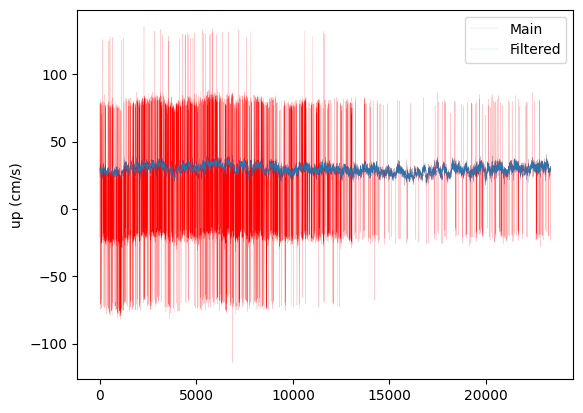

In [28]:
plt.plot(ui, color='red', lw=0.07, label='Main')
plt.plot(uf, lw=0.08, label='Filtered')
plt.ylabel('up (cm/s)')
plt.legend(loc='upper right')
plt.show()

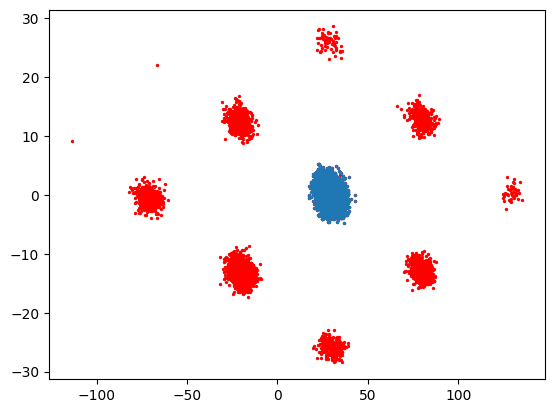

In [29]:
plt.scatter(ui, wi, c='r', s=2)
plt.scatter(uf, wf, s=2)
plt.show()

In [30]:
print(dfm.describe())
print(dff.describe())

                 ui            vi            wi
count  23355.000000  23355.000000  23355.000000
mean      24.536887     -0.972663     -1.088736
std       24.430694      7.930809      5.940335
min     -113.960000    -55.690000    -28.450000
25%       26.060000     -1.940000     -1.540000
50%       28.970000     -0.430000     -0.370000
75%       31.700000      1.040000      0.760000
max      135.530000    104.390000     28.630000
                 uf            vf            wf
count  23355.000000  23355.000000  23355.000000
mean      29.567649     -0.389986     -0.196328
std        3.179723      2.166880      1.323302
min       17.410000    -11.150000     -4.800000
25%       27.408750     -1.760000     -1.115000
50%       29.562500     -0.380000     -0.230000
75%       31.810000      1.040000      0.660000
max       43.000000      8.250000      5.310000


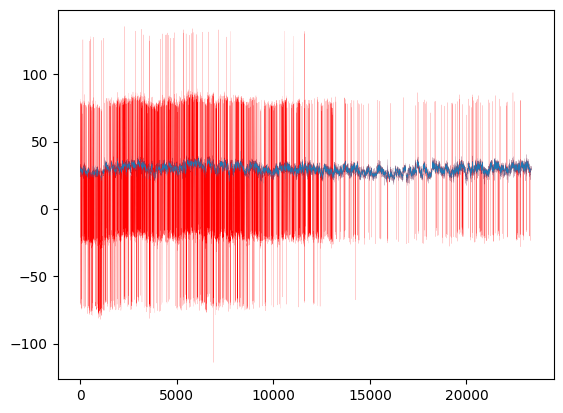

In [33]:
#plt.plot(ui, lw=0.07, color='r')
plt.plot(uf, lw=0.07)
plt.show()

In [34]:
df = pd.read_csv('sig.csv')
df

,u,v,w
0,44.96,-92.78,8.96
1,23.54,-94.40,11.92
2,5.91,-78.83,6.62
3,15.94,-78.24,4.30
4,-2.69,-94.97,11.95
...,...,...,...
995,39.97,-62.51,21.24
996,38.70,-39.66,18.10
997,24.15,-42.21,29.17
998,6.03,-35.97,7.66


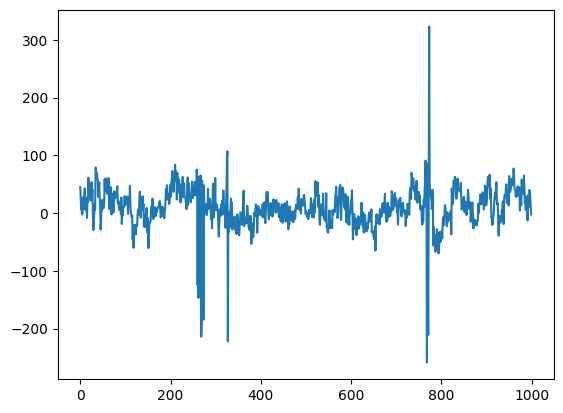

In [35]:
plt.plot(df['u'])

In [36]:
u = np.array(df['u'])

In [37]:
mean_u = np.mean(u)
mean_u

9.612639999999999

In [59]:
def moving_average(data, window_size=20):
    if window_size > data.size:
        raise ValueError("Data array size must not be lower than window size")
    ma = np.zeros(data.size) # Moving Average
    for i in range(window_size):
        ma[i] = np.mean(data[:i+1])
    for i in range(window_size, data.size):
        ma[i] = ma[i-1] + (data[i] - data[i-window_size])/window_size
    return ma

In [73]:
np.random.seed(1000)
arr = np.random.rand(300)
arr *= 100
arr_ma = moving_average(arr, 30)

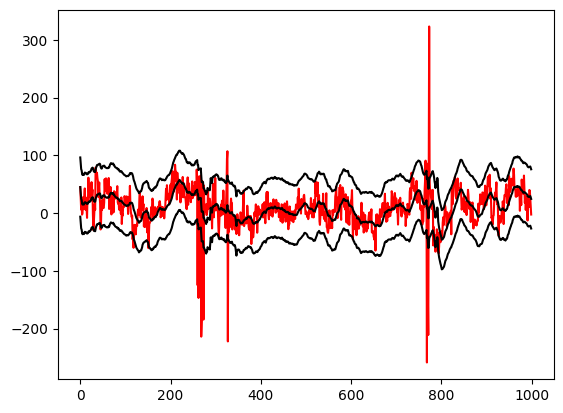

In [82]:
u_ma = moving_average(u)
std_u = np.std(u)
k = 1.5
upper_limit = u_ma + k * std_u
lower_limit = u_ma - k * std_u
plt.plot(u, color='red')
plt.plot(u_ma, color='k')
plt.plot(upper_limit, color='k')
plt.plot(lower_limit, color='k')
plt.show()